In [1]:
import networkx as nx
import community as community_louvain
from sklearn.metrics import silhouette_score
from node2vec import Node2Vec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
G = nx.read_edgelist("graph.net", create_using=nx.Graph(), nodetype=int)

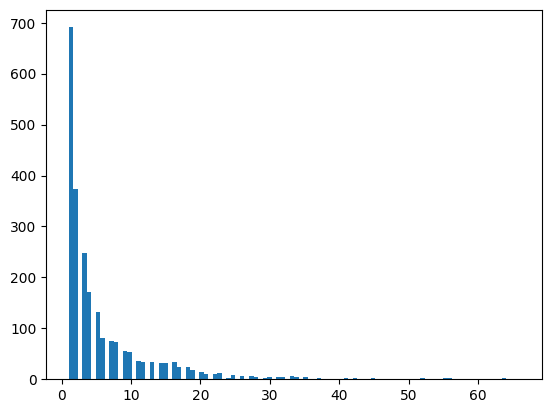

In [3]:
#plot the nodes and the number of their connections
plt.hist(list(dict(G.degree()).values()), bins=100)
plt.show()


In [104]:
#make subgraph for each degree from 1 to 10
subgraphs = []
fd = 10
for i in range(1, fd):
    subgraphs.append(G.subgraph([node for node, degree in dict(G.degree()).items() if degree == i]))
    print(i)

sg = G.subgraph([n for n, d in G.degree() if d >= fd])
subgraphs.append(sg)

1
2
3
4
5
6
7
8
9


In [112]:
import networkx.algorithms.community.label_propagation as lp
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import louvain_communities, asyn_fluidc

In [106]:
def get_communities(G):
    communities = asyn_fluidc(G, 10)
    return list(communities)

In [107]:
dic = {}
for i, sg in enumerate(subgraphs):
    communities = get_communities(sg)
    dic[f'sg{i}'] = communities

In [108]:
#save to df node_id, community_id
def save_to_df(communities):
    data = []
    for i, c in enumerate(communities):
        for node in c:
            data.append([node, i+1])
    return pd.DataFrame(data, columns=['id', 'community'])

In [109]:
dfs = []
for key, value in dic.items():
    df = save_to_df(value)
    dfs.append(df)

print(len(dfs))

10


In [110]:
#concatenate all dfs
df = pd.concat(dfs)
#sort by node
df = df.sort_values(by=['id'])
df

,id,community
0,1,1
1,2,2
219,3,7
2,4,3
111,5,3
...,...,...
111,2357,106
102,2358,102
201,2359,5
183,2360,184


In [111]:
#save the results to a csv
df.to_csv('communities10.csv', index=False)
